## Описание проекта
Имеется датафрейм интернет-магазина `«Стримчик»`, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, `Xbox или PlayStation`). В исследовании необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
В датафрейме представленны данные `до 2016 года`. Необходимо предсказать/спланировать кампанию `на 2017-й`.  

## Откроем файл с данными и изучим общую информацию

Для начала необходимо провести первичный осмотр данных: из каких столбцов состоит датафрейм, какие столбцы числовые, булевые и текстовые. Уже по первым пяти строкам мы видим, где присутствуют пропущенные значения. Оценим типы столбцов и заполним пропуски медианными значениями. Далее построим гистограммы и оценим - каким зависимостям подчиняются числовые столбцы. У `'NA_sales', 'EU_sales', 'JP_sales'` пик около нулевого значения, убывающие по мере роста целевой функции. Поэтому пропущенные значения актуальнее заполнить медианными значениями.

В случае `'Year_of_Release' и 'Critic_Score'` похожи на распределение Пуассона с пиком в правой части графика.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from scipy import stats as st

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
display(df.head(10));
display(df.info());

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [4]:
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Кол-во строк и столбцов изначального датафрейма:

In [5]:
df.shape

(16715, 11)

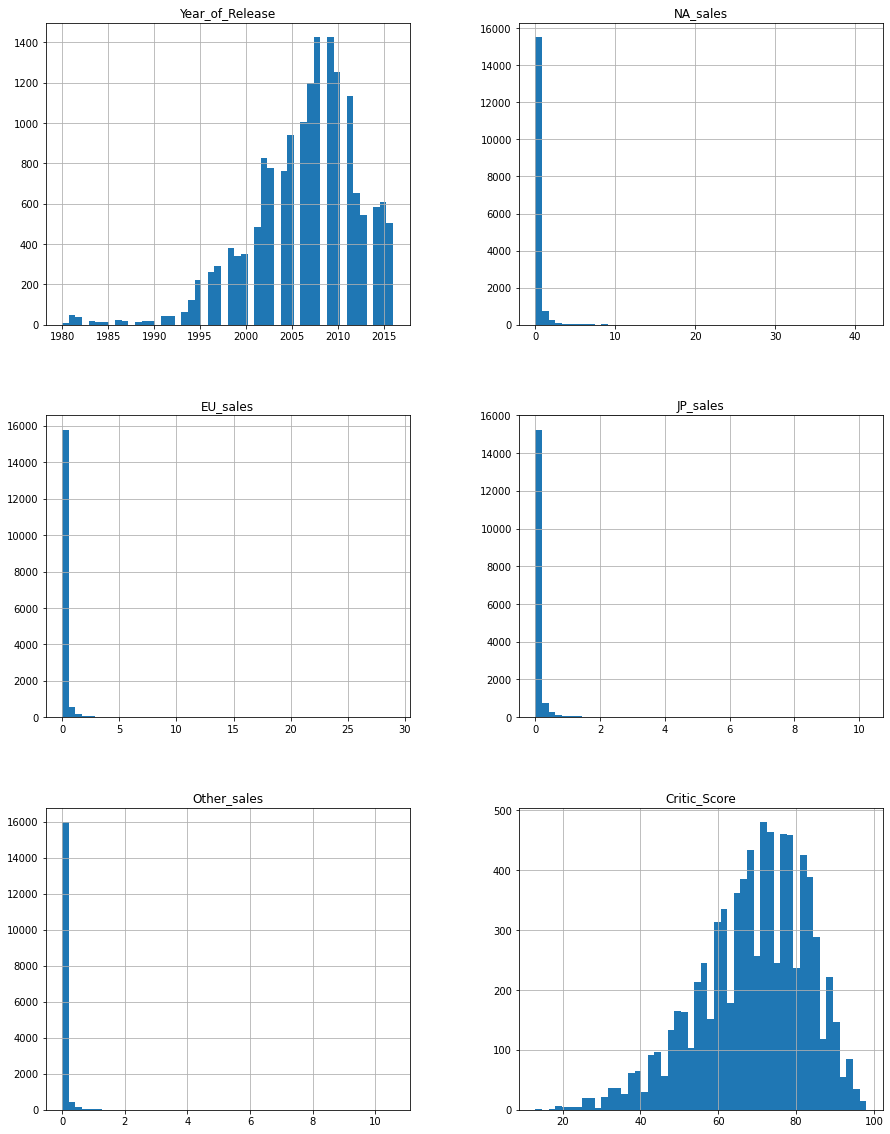

In [6]:
df.hist(figsize=(15, 20), bins=50);

## Предобработка данных

Следуя правилам синтаксиса и хорошему стилю, было обнаружено, что названия колонок начинаются с заглавных букв. Приведем их всех к нижнему регистру:

In [7]:
df.columns = df.columns.str.lower()
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Давайте посмотрим, какие есть уникальные значения в столбцах:

In [8]:
display(df['user_score'].sort_values().unique())

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Значения столбца `'user_score'` должны быть числовыми типа `'float'`. Отсортировав по возрастанию, мы видим, что имеются `'tbd'` (текстовое значение) и `'nan'` (пропуски). Давайте на следующем шаге изменим значение `'tbd'` просто на пропуск `'nan'`.

In [9]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
display(df['user_score'].sort_values().unique())

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

Теперь `'tbd'` в столбце `'user_score'` не существует, вместо них стоят пропуски `'nan'`. После этого шага теперь можно спокойно заполнить эти ячейки необходимыми значениями.

In [10]:
display(df['critic_score'].sort_values().unique())

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

Рассмотрим типы данных в каждом столбце:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В некоторых числовых данных замечено, что присвоен не совсем корректный тип данных. Для таких столбцов, как: `'user_score' `(оценка пользователей) используется тип `'object'`, когда нужно использовать тип `'float64'` с точностью до 1 знака после запятой.

`'year_of_release'` (год выпуска) типа `'float'`. Для этого столбца странно и просто не логично использовать тип `'float'`, приведём его к `'int'`, но для этого сначала нужно заполнить пропуски. Т.к. в `'year_of_release'` имеется 269 пропусков, то будет достаточно сложно расставить к отдельно взятым играм их год выпуска, т.к. заполнять построчно слишком кропотливо и противоречит мышлению программиста и технаря. Пометим незаполненные значения в '`year_of_release'` значением -1. Далее приведем к типу `'int'`.

По хорошему, `'year_of_release'` нужно привести к типу int, но для этого сначала необходимо заполнить пропуски. Распределение достаточно ровно, представляет из себя распределение Пуассона, скошенное влево. Но заполнять пропуски медианными значениями будет достаточно глупо, т.к. если в последствии рассматривать отдельно взятые игры, их год выпуска не будет соответсвовать реальным годам выпуска игры, что будет являться ошибкой. И поэтому, чтобы не портить таблицу и не забивать её ложными данными, оставим пропуски и, соответственно, тип данных `'float64'` для `'year_of_release'`.

In [12]:
display(round(df['year_of_release'].isna().mean()*100, 3))

1.609

В `year_of_release` имеется всего-лишь **1,6%** пропусков. Можем спокойно удалить значения этого столбца.

In [13]:
df = df.dropna(subset=['name', 'genre', 'year_of_release'])

df['year_of_release'] = df['year_of_release'].astype(int)
display(df['year_of_release'].sort_values().unique())

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

In [14]:
display(df.isna().mean())

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.405984
dtype: float64

Кол-во пропусков после удаления пропусков в столбце `year_of_release`.

In [15]:
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Найдем и изучим пропущенные значения в столбцах
Пропуски имеются в столбцах `'user_score', 'critic_score', 'rating', 'year_of_release', 'name' и 'genre'`.

In [16]:
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Рассмотрим кол-во пропусков в датафрейме по убыванию кол-ва пропусков в столбцах:

In [17]:
df.isna().sum().sort_values(ascending=False)

user_score         8981
critic_score       8461
rating             6676
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [18]:
df[(df['user_score'].isna()) & (df['critic_score'].isna()) & (df['rating'].isna())].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [19]:
df[(df['user_score'].isna()) & (df['critic_score'].isna()) & (df['rating'].isna())].count()[1]

6580

Для столбцов `'user_score', 'critic_score', 'rating'` имеется *6667* общих строк с пропусками. Скорее всего, это взаимосвязано. Можно заполнить эти столбцы медианными значениями, потому что распределения являются распределениями Пуассона, скошенными влево. Но графики сами по себе чистые, ровные, практически идеальные. По ним можно сразу искать нужные значения медиан и средних.

Построим график по убыванию кол-ва пропусков в столбцах в **`%`** :

In [20]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', color='lategray', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Кол-во пропусков в % соотношении от кол-ва строк в столбце' + "\n", fontsize = 22, color = 'indigo')    
        );    
    except:
        print('пропусков не осталось :) ')

пропусков не осталось :) 


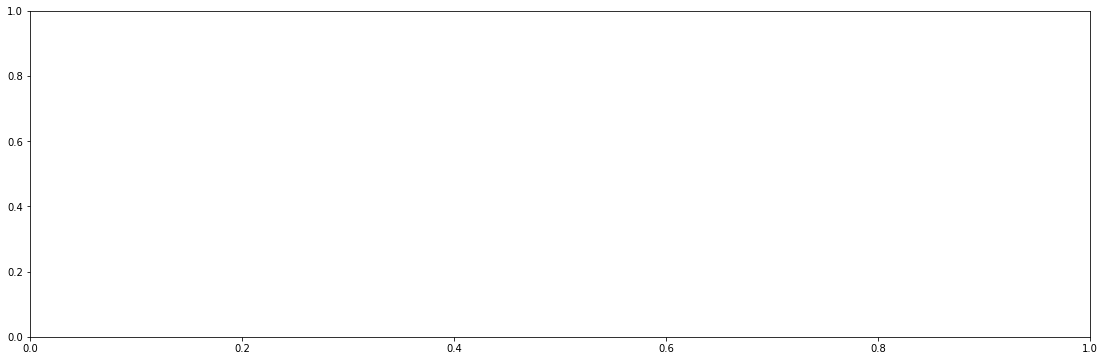

In [21]:
pass_value_barh(df)

В `critic_score, user_score` оставляем пропуски, потому что уникальных игр `name` огромное множество. Нет общей медианы на отдельно взятую игру. Допустим, игра присутвует на 4х платформах, в 3х из них стоит рейтинг. Но по этим 3м рейтингам мы не сможем проставить по медиане 4ый рейтинг. Потому что отдельно взятые платформы занимают свои нишы, как на общих рынках, допустим, Америки и Европы, но в Японии в неё вообще могут не играть.
   
Подобная замена медианой в дальнейшем исказит наши результаты.

In [22]:
df['rating'] = df['rating'].fillna('no_rating');
display(df['rating'].sort_values().unique())

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'no_rating'],
      dtype=object)

Так выглядят продажи в разных регионах

Кол-во строк после среза хвостов:

In [23]:
# check
df.shape

(16444, 11)

In [24]:
x = (16715 - df.shape[0]) / 16715
print('Процент потерь:', round(x, 4)*100, '%')

Процент потерь: 1.6199999999999999 %


После предобработки в датафрейме `16444` строк и процент потерь: `1.62 %`. Этого вполне достаточно, чтобы продолжить анализ.


### Посчитаем суммарные продажи в каждом столбце и запишем их в новый столбец:

In [25]:
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating


In [26]:
df['sum_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1);

In [27]:
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные года

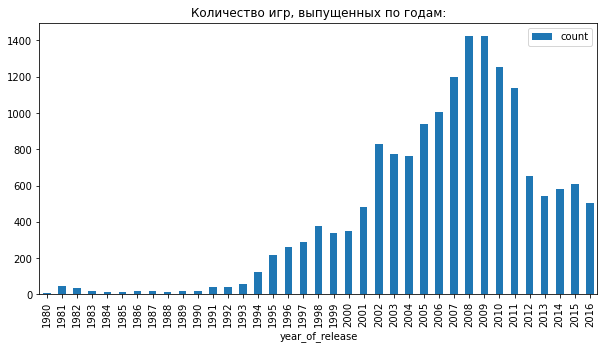

In [28]:
count_per_years = df[df['year_of_release'] > 0].groupby('year_of_release')['name'].agg(['count'])
count_per_years.plot(kind='bar', title = 'Количество игр, выпущенных по годам:', figsize = (10,5));

Мы видим, что до *2000* игр выпускалось крайне мало, вероятно индустрия только зарождалась. Скачок произошел с *2001-2002* и длился до пика *2008-2009 года*, после чего количество выпускаемых игр пошло на спад, полагаю это может быть связано с разивтием мобильной индустрии, увеличением времени и средств на разработку игр.

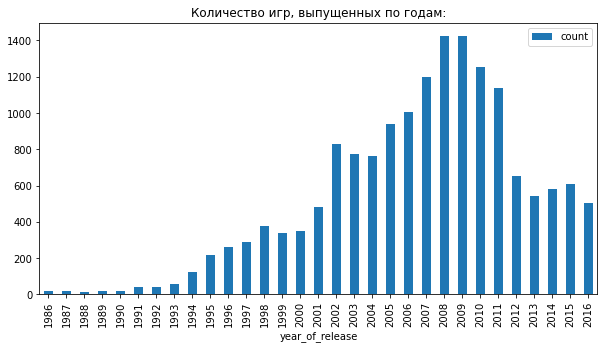

In [29]:
count_per_years = count_per_years.query('year_of_release >= 1986')
count_per_years.plot(kind='bar', title = 'Количество игр, выпущенных по годам:', figsize = (10,5));

Наиболее заметный рост кол-ва игр начался в 1996 году. Пик же пришелся на `2008 г. - 174, 2010 - 179, 2011 - 177`. Далее кол-во выпускаемых игр пошло на спад.

### Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам.

#### Отберем топ-10 платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

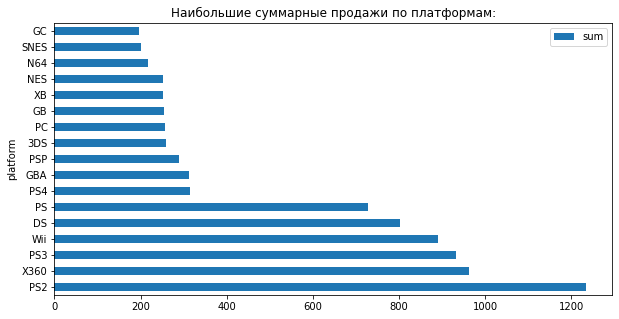

In [30]:
sales_by_platform = df.groupby('platform')['sum_sales'].agg(['sum']).sort_values(by='sum', ascending=False)
display(pd.unique(df['platform']))

top_ten_platforms = sales_by_platform.query('sum > 188')
top_ten_platforms.plot(kind='barh', title = 'Наибольшие суммарные продажи по платформам:', figsize = (10,5));

Наибольшие суммарные продажи у `'3DS', 'NES', 'GB', 'PS4', 'PS', 'DS', 'Wii', 'PS2', 'X360', 'PS3'` по возрастанию продаж. 

#### Построим распределения по годам и выберем актуальный период

In [31]:
df_sales_by_platform = df.groupby('platform')['year_of_release'].agg(['count'])
display(df_sales_by_platform)

,count
platform,
2600,116
3DO,3
3DS,512
DC,52
DS,2121
GB,97
GBA,811
GC,542
GEN,27


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


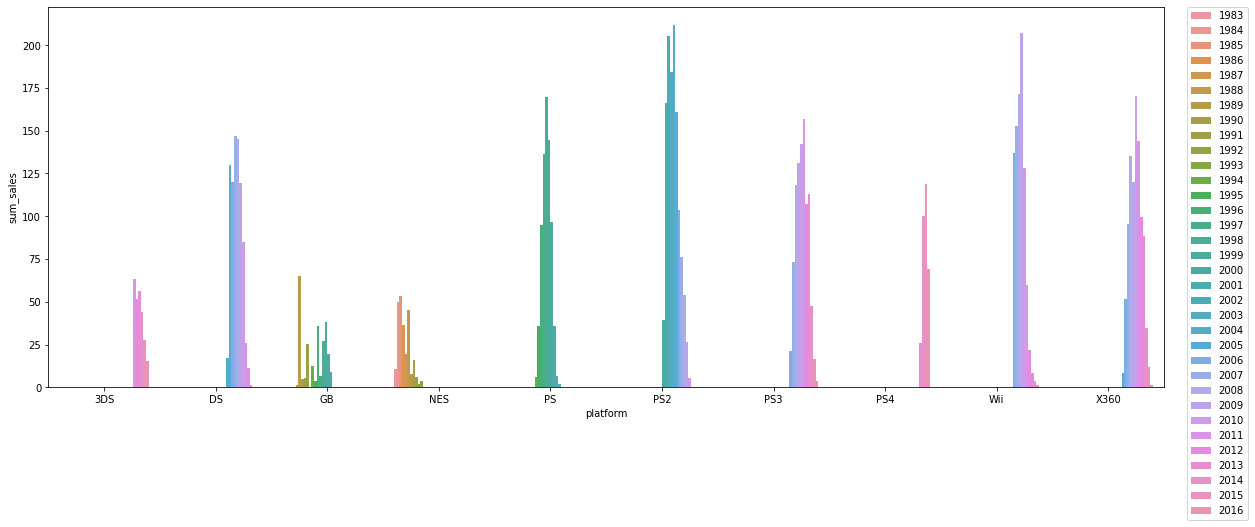

In [32]:
top_sales = ['3DS', 'NES', 'GB', 'PS4', 'PS', 'DS', 'Wii', 'PS2', 'X360', 'PS3']
rows = df['platform'].isin(top_sales)
df_top_sales = df.loc[rows].query('year_of_release > 0')
display(df_top_sales.head())

df_top_sales_plot = df_top_sales.groupby(['platform', 'year_of_release'], as_index=False)['sum_sales'].sum()

plt.figure(figsize = (20,7))
ax = sns.barplot(data=df_top_sales_plot,
                 x='platform',
                 y='sum_sales',
                 hue='year_of_release')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);


**Второй способ построения графика:**

<Figure size 1440x504 with 0 Axes>

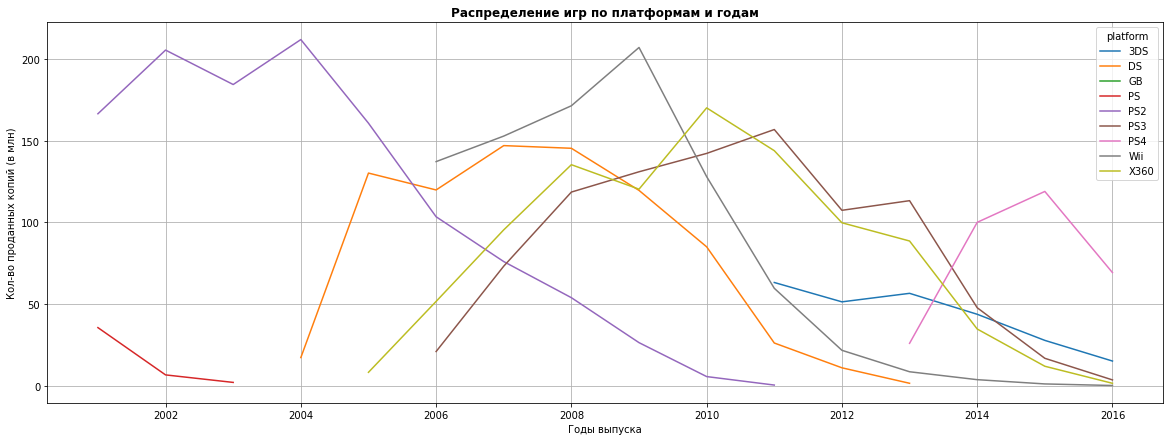

In [33]:
plt.figure(figsize = (20,7))
df_top_sales_plot = df_top_sales.groupby(['platform', 'year_of_release'], as_index=False)['sum_sales'].sum()

(df
    .query('platform in @top_sales and year_of_release > 2000')
    .pivot_table(index=['year_of_release'], columns='platform', values=['sum_sales'], aggfunc='sum')
    .reset_index()
    .plot(x='year_of_release', y='sum_sales', kind='line', grid=True, figsize = (20,7))
);

plt.title('Распределение игр по платформам и годам', fontweight='bold')
plt.xlabel('Годы выпуска')
plt.ylabel('Кол-во проданных копий (в млн)')
plt.show();

<b>Вывод:</b>  
1.Судя из графика, можно сделать вывод, что платформами, которые пользуются популярностью `с 2013 по 2016 год` стали:
    
    'PS4', 'PS3', '3DS', 'X360', 'Wii'
2. Актуальный период получился с `2013 по 2016 гг`.

#### Поиск лидеров по продажам в актуальном периоде

Для этого отсечём методом .query данные с датафрейма по актуальному периоду `с 2013-2016 гг.`:

In [34]:
data_actual = df.query('year_of_release >= 2013')
data_actual_grouped = data_actual.groupby(['platform', 'year_of_release'], as_index=False)['sum_sales'].sum()

In [35]:
display(data_actual['year_of_release'].unique())

array([2013, 2015, 2014, 2016])

In [36]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


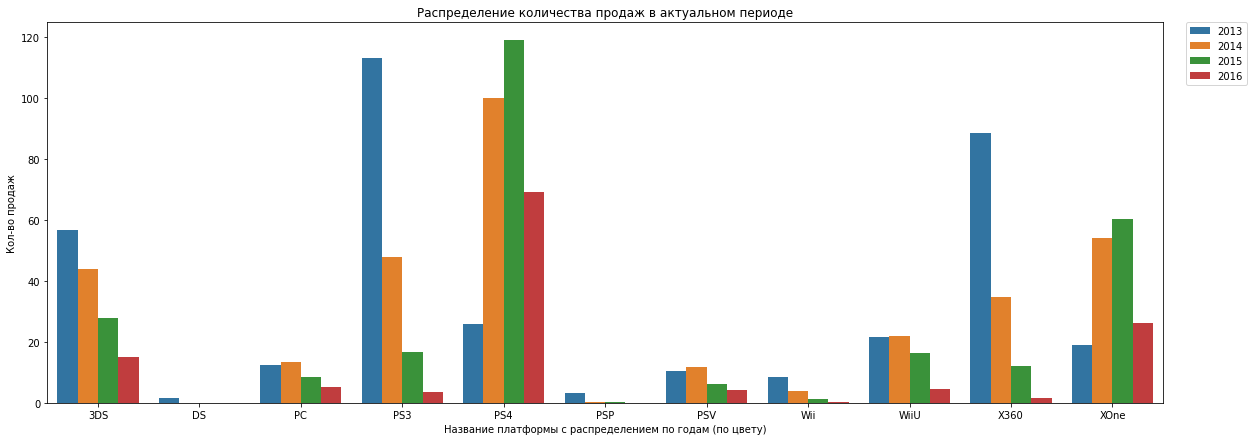

In [37]:
plt.figure(figsize = (20,7))
ax = sns.barplot(data=data_actual_grouped,
                 x='platform',
                 y='sum_sales',
                 hue='year_of_release')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title('Распределение количества продаж в актуальном периоде')
ax.set(xlabel='Название платформы с распределением по годам (по цвету)', ylabel='Кол-во продаж');

<b>Вывод:</b>
1.Судя из графика, можно сделать вывод, что платформами, которые пользуются популярностью `с 2013 по 2016` год стали:
    
    'PS4', 'PS3', 'X360', '3DS'
2. Актуальный период получился `с 2013 по 2016 гг`.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [38]:
display(data_actual.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


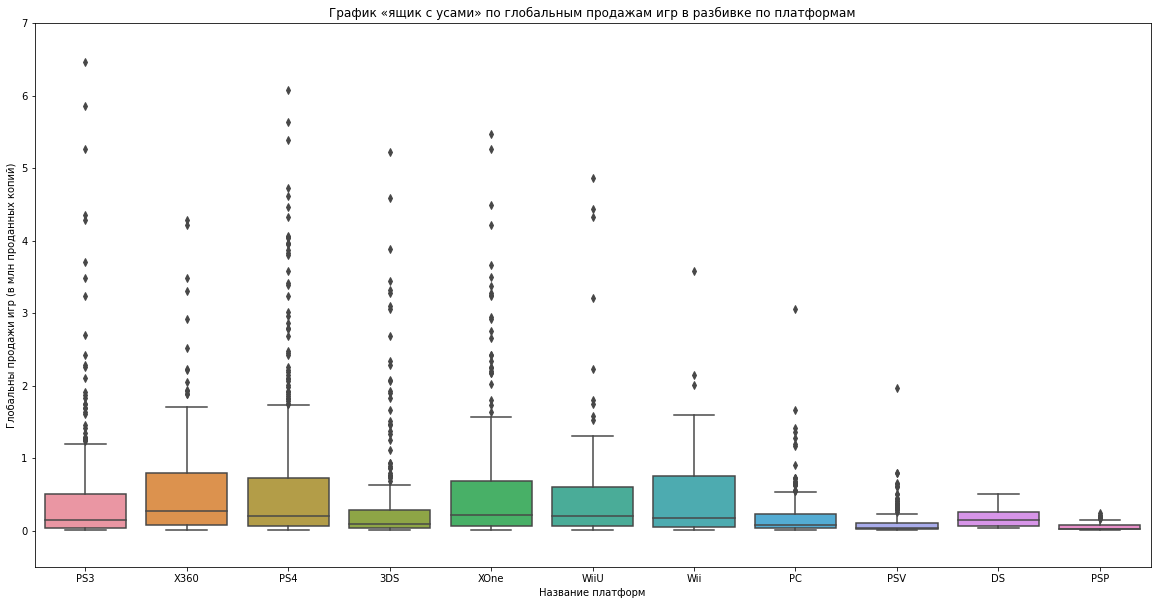

In [39]:
df_game_sales = df_top_sales.groupby(['name', 'platform'], as_index=False)['sum_sales'].sum() \
                            .sort_values('sum_sales', ascending=False)
plt.figure(figsize = (20,10))
plt.ylim(-0.5, 7)
ax = sns.boxplot(data=data_actual,
                 x="platform",
                 y="sum_sales")
ax.set_title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
ax.set(xlabel='Название платформ', ylabel='Глобальны продажи игр (в млн проданных копий)');

<b>Вывод:</b>
1.Судя из графика, можно сделать вывод, что платформами, которые пользуются популярностью `с 2013 по 2016 год` стали:
    
    'PS4', 'PS3', '3DS', 'X360', 'Wii'
2. Актуальный период получился `с 2013 по 2016 гг`.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков и сравним с продажами игр на других платформах

Отберём для начала самую крупную платформу. Самая высокая медиана у 'PS4' и верхний квантиль тоже в тройке максимумов.

In [55]:
df_top_sales_plot
top_sales = ['3DS', 'PS4', 'PS', 'DS', 'Wii', 'PS2', 'X360', 'PS3']

In [54]:
display(data_actual.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Построение для оценки пользователей и продаж `'X360', 'PS3', 'PS4'` ниже.

Рассчитаем коэфф-т корреляции между оценкой пользователей и продажами для "X360": -0.012
Рассчитаем коэфф-т корреляции между оценкой пользователей и продажами для "PS3": 0.002
Рассчитаем коэфф-т корреляции между оценкой пользователей и продажами для "PS4": -0.032


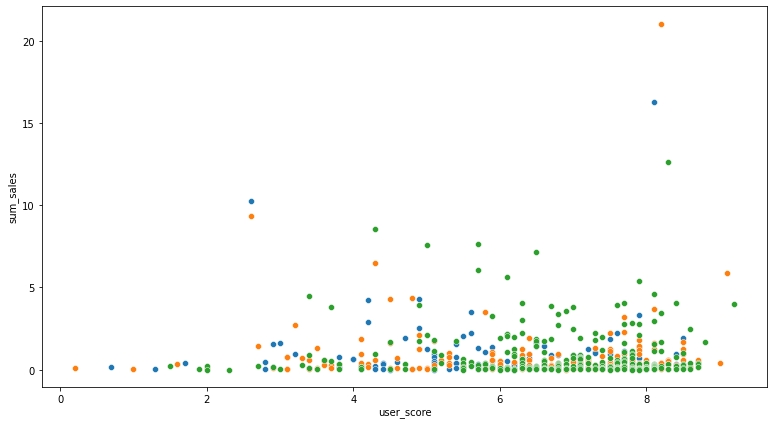

In [81]:
platform_list = ['X360', 'PS3', 'PS4']
plt.figure(figsize = (13,7))
for el in platform_list:
    df_best_seller = data_actual[(data_actual['platform'] == str(el)) & (data_actual['user_score'].notna())]
    sns.scatterplot(data=df_best_seller, x="user_score", y="sum_sales")
    ;
    print(f'Рассчитаем коэфф-т корреляции между оценкой пользователей и продажами для "{str(el)}":', \
         round(df_best_seller['user_score'].corr(df_best_seller['sum_sales']), 3))
    

Построение для оценки критиков и продаж `'X360', 'PS3', 'PS4'` ниже.

Рассчитаем коэфф-т корреляции между оценкой критиков и продажами для "X360": 0.35
Рассчитаем коэфф-т корреляции между оценкой критиков и продажами для "PS3": 0.334
Рассчитаем коэфф-т корреляции между оценкой критиков и продажами для "PS4": 0.407


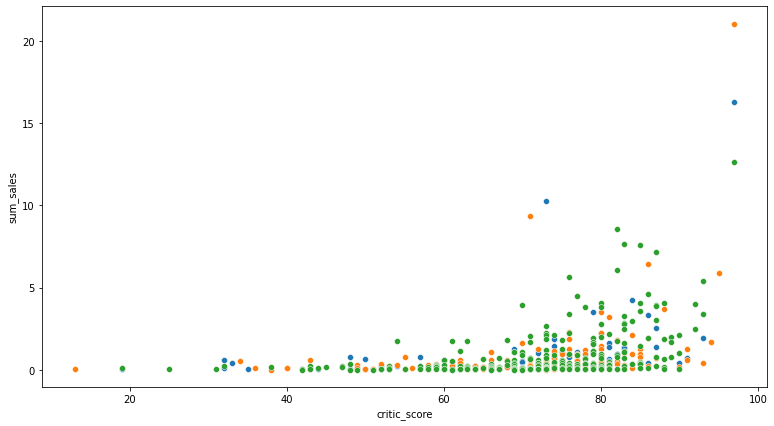

In [82]:
plt.figure(figsize = (13,7))
for el in platform_list:
    df_best_seller = data_actual[(data_actual['platform'] == str(el)) & (data_actual['critic_score'].notna())]
    sns.scatterplot(data=df_best_seller, x="critic_score", y="sum_sales");
    print(f'Рассчитаем коэфф-т корреляции между оценкой критиков и продажами для "{str(el)}":', \
         round(df_best_seller['critic_score'].corr(df_best_seller['sum_sales']), 3))

<b>Вывод:</b>  
В целом коэффициенты корреляций относительно невысокие.
    
Коэффициенты корреляции отн-о критиков **выше**, чем коэф. корреляции для пользователей.
    
Если коэфф. корреляции для оценок критиков:
    
    "PS4": 0.407
    "PS3": 0.334
    "X360": 0.35

То коэфф. корреляции для оценок пользователей:
    
    "PS4": -0.032
    "X360": -0.012
    "PS3": 0.002
    
Из чего можно сделать вывод, что *присутствует некоторая корреляция* между суммарными продажами и оценкой критиков. А в случае между суммарными продажами и оценкой пользователей *корреляции нет*.

### Посмотрим на общее распределение игр по жанрам.

In [83]:
sales_by_platform = df.groupby('genre', as_index=False)['sum_sales'].sum() \
                      .sort_values(by='sum_sales', ascending=False)

display(sales_by_platform)

,genre,sum_sales
0,Action,1716.52
10,Sports,1309.67
8,Shooter,1041.36
7,Role-Playing,931.08
4,Platform,825.55
3,Misc,790.29
6,Racing,723.49
2,Fighting,442.66
9,Simulation,387.96
5,Puzzle,239.89


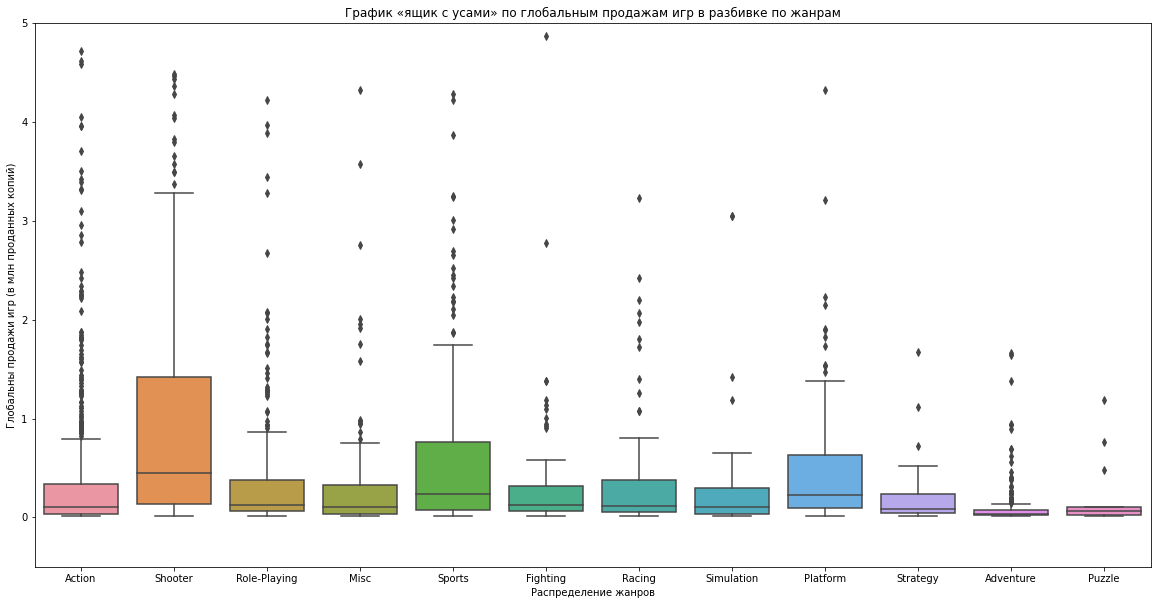

In [84]:
plt.figure(figsize = (20,10))
plt.ylim(-0.5, 5)
ax = sns.boxplot(data=data_actual,
                 x="genre",
                 y="sum_sales")
ax.set_title('График «ящик с усами» по глобальным продажам игр в разбивке по жанрам')
ax.set(xlabel='Распределение жанров', ylabel='Глобальны продажи игр (в млн проданных копий)');


<b>Вывод:</b>
1. Самый высокий верхний квартиль и медиана у `'Shooter'`. Следом идут `'Sports' и 'Platform'` их медианы и верхние квартили, примерно, на одном уровне.
2. Самые же малочисленные жанры: `'Strategy', 'Adventure', 'Puzzle'`, по мере убывания кол-ва проданных копий.

## Составим портрет пользователя каждого региона

### Определим для пользователей региона NA (Северная Америка) следующие параметры:

#### Самые популярные (топ-5) платформ:

In [85]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


Среднее:


77

Медиана:


82

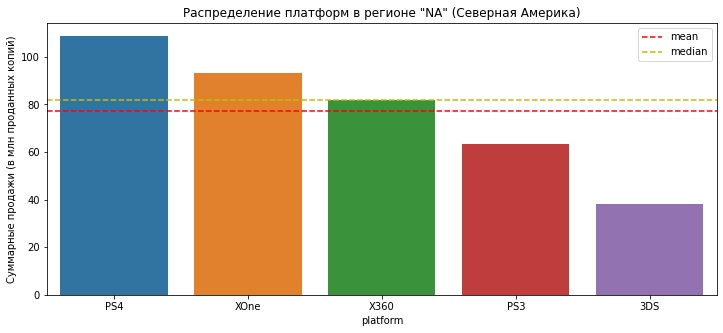

In [86]:
platform_na_top_5 = data_actual.groupby('platform', as_index=False)['na_sales'].sum().nlargest(5, 'na_sales')
display(platform_na_top_5)

print('Среднее:')
display(round(platform_na_top_5['na_sales'].mean()))
print('Медиана:')
display(round(platform_na_top_5['na_sales'].median()))

plt.figure(figsize = (12,5))
ax = sns.barplot(data=platform_na_top_5,
                 x='platform',
                 y='na_sales')
ax.axhline(y = platform_na_top_5['na_sales'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axhline(y = platform_na_top_5['na_sales'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title('Распределение платформ в регионе "NA" (Северная Америка)')
plt.ylabel('Суммарные продажи (в млн проданных копий)');

**Вывод**

Для региона Северной Америки две самые популярные конкурирующие платформы, которые выше медианы `'PS4' и 'XOne'`. Прям на медиане располагается  `'X360' - 82 млн копий`.

Самая низкая по продажам `'3DS'`.

#### Самые популярные жанры (топ-5) для NA:

In [ ]:
data_actual.head()

In [ ]:
genre_na_top_5 = data_actual.groupby('genre', as_index=False)['na_sales'].sum().nlargest(5, 'na_sales')
display(genre_na_top_5)

print('Среднее:')
display(round(genre_na_top_5['na_sales'].mean()))
print('Медиана:')
display(round(genre_na_top_5['na_sales'].median()))

plt.figure(figsize = (12,5))
ax = sns.barplot(data=genre_na_top_5,
                 x='genre',
                 y='na_sales')
ax.axhline(y = genre_na_top_5['na_sales'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axhline(y = genre_na_top_5['na_sales'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title('Распределение жанров в регионе "NA" (Северная Америка)')
plt.ylabel('Суммарные продажи (в млн проданных копий)')
plt.show()

**Вывод**

Для региона **Северной Америки** самые популярные жанры: `'Action', 'Shooter'`. Прям на медиане располагается `'Sports' - 65.27 млн копий`.

Остальные жанры находятся ниже.

В данных попадается аббревиатура `ESRB (Entertainment Software Rating Board)` — это ассоциация, определяющая возрастной рейтинг компьютерных игр. `ESRB` оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, `«Для взрослых», «Для детей младшего возраста» или «Для подростков»`.

В работе изучим, влияет ли рейтинг ESRB на продажи в исследуемых регионах?

#### Проверим, влияет ли рейтинг ESRB на продажи в NA?

In [ ]:
display(df_top_sales.head())

In [ ]:
rating_na_top_5 = data_actual.groupby('rating', as_index=False)['na_sales'].sum().nlargest(5, 'na_sales')
display(rating_na_top_5)

print('Среднее:')
display(round(rating_na_top_5['na_sales'].mean()))
print('Медиана:')
display(round(rating_na_top_5['na_sales'].median()))

plt.figure(figsize = (12,5))
ax = sns.barplot(data=rating_na_top_5,
                 x='rating',
                 y='na_sales')
ax.axhline(y = rating_na_top_5['na_sales'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axhline(y = rating_na_top_5['na_sales'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title('Зависимость продаж от рейтинга в "NA" (Северная Америка)')
plt.ylabel('Суммарные продажи (в млн проданных копий)')
plt.show()

**Вывод**

Медиана расположилась на значении `79 млн копий`. Следовательно, от неё можно отсчитывать 3 основные рейтинга, которые повлияли на продажи. Более всех влияют на продажи два рейтинга: `'M', 'no_rating' и 'E'` (располагается прямо на медиане). Замыкает четвёрку рейтинг `'E10+'`.

Наименьшее влияние у `'T' около 49.79 млн копий`.

<b>Вывод по NA:</b>
1. Для региона Северной Америки две самые популярные конкурирующие платформы, которые выше медианы `'PS4' и 'XOne'`. Прям на медиане располагается `'X360' 82 млн копий`.
2. Для региона Северной Америки самые популярные жанры: `'Action', 'Shooter'`. Прям на медиане располагается `'Sports' 65.27`.
3. Более всех влияют на продажи два рейтинга: `'M', 'no_rating' и 'E' `(располагается прямо на медиане). Замыкает четвёрку рейтинг `'E10+'`.

### Определим для пользователей региона EU (Европа) следующие параметры:

#### Самые популярные (топ-5) платформ в Европе:

In [ ]:
platform_eu_top_5 = data_actual.groupby('platform', as_index=False)['eu_sales'].sum().nlargest(5, 'eu_sales')
display(platform_eu_top_5)

print('Среднее:')
display(round(platform_eu_top_5['eu_sales'].mean()))
print('Медиана:')
display(round(platform_eu_top_5['eu_sales'].median()))

plt.figure(figsize = (12,5))
ax = sns.barplot(data=platform_eu_top_5,
                 x='platform',
                 y='eu_sales')
ax.axhline(y = platform_eu_top_5['eu_sales'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axhline(y = platform_eu_top_5['eu_sales'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title('Распределение платформ в регионе "EU" (Европа)')
plt.ylabel('Суммарные продажи (в млн проданных копий)');

**Вывод**

Для региона Европа две самая популярная платформа `'PS4' и 'PS3'`.

На третьем месте платформа, которая располагается на медиане `'XOne' - 51.59 млн копий`.

Замыкает четверку платформа `'X360'`, его значение - `42.52 млн копий`.

Самая низкая по продажам `'PS' - 30.96 млн копий`.

#### Самые популярные жанры (топ-5) для `EU (Европа)`:

In [ ]:
genre_eu_top_5 = data_actual.groupby('genre', as_index=False)['eu_sales'].sum().nlargest(5, 'eu_sales')
display(genre_eu_top_5)

print('Среднее:')
display(round(genre_eu_top_5['eu_sales'].mean()))
print('Медиана:')
display(round(genre_eu_top_5['eu_sales'].median()))

plt.figure(figsize = (12,5))
ax = sns.barplot(data=genre_eu_top_5,
                 x='genre',
                 y='eu_sales')
ax.axhline(y = genre_eu_top_5['eu_sales'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axhline(y = genre_eu_top_5['eu_sales'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title('Распределение жанров в регионе "EU" (Европа)')
plt.ylabel('Суммарные продажи (в млн проданных копий)')
plt.show()

**Вывод**

Для региона Европа самые популярные жанры: `'Action', 'Shooter' и 'Sports'`. `'Sports' 60.52 млн копий` располагается на медиане `61 млн копий`.

Остальные жанры находятся ниже: `'Role-Playing', 'Racing'`.

#### Проверим, влияет ли рейтинг ESRB на продажи в `EU (Европа)`?

In [ ]:
rating_eu_top_5 = data_actual.groupby('rating', as_index=False)['eu_sales'].sum().nlargest(5, 'eu_sales')
display(rating_eu_top_5)

print('Среднее:')
display(round(rating_eu_top_5['eu_sales'].mean()))
print('Медиана:')
display(round(rating_eu_top_5['eu_sales'].median()))

plt.figure(figsize = (12,5))
ax = sns.barplot(data=rating_eu_top_5,
                 x='rating',
                 y='eu_sales')
ax.axhline(y = rating_eu_top_5['eu_sales'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axhline(y = rating_eu_top_5['eu_sales'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title('Распределение жанров в регионе "EU" (Европа)')
plt.ylabel('Суммарные продажи (в млн проданных копий)')
plt.show()

**Вывод**

*Медиана* расположилась на значении `79 млн копий`. Следовательно, от неё можно отсчитывать 3 основные рейтинга, которые повлияли на продажи. Более всех влияют на продажи два рейтинга: `'М', 'E' и 'no_rating' 78.91 млн копий` находится прям ровно на медиане **79**.

Наименьшее влияние у `'T' около 41.95 млн копий`.

<b>Вывод по EU:</b>
1. Для региона **Европа** две самые популярные платформы `'PS4' и 'PS3'`. На третьем месте платформа, которая располагается на медиане `'XOne' - 51.59 млн копий`.
2. Для региона Европа самые популярные жанры: `'Action', 'Shooter' и 'Sports'`. `'Sports' 60.52 млн копий` располагается на медиане `61 млн копий`.
3.  Более всех влияют на продажи два рейтинга: `'М', 'E' и 'no_rating' 78.91 млн копий` находится прям ровно на медиане `79 млн копий`.

### Определим для пользователей региона `JP (Япония)` следующие параметры:

#### Самые популярные (топ-5) платформ `JP (Япония)`:

In [ ]:
platform_jp_top_5 = data_actual.groupby('platform', as_index=False)['jp_sales'].sum().nlargest(5, 'jp_sales')
display(platform_jp_top_5)

print('Среднее:')
display(round(platform_jp_top_5['jp_sales'].mean()))
print('Медиана:')
display(round(platform_jp_top_5['jp_sales'].median()))

plt.figure(figsize = (12,5))
ax = sns.barplot(data=platform_jp_top_5,
                 x='platform',
                 y='jp_sales')
ax.axhline(y = platform_jp_top_5['jp_sales'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axhline(y = platform_jp_top_5['jp_sales'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title('Распределение платформ в регионе "JP" (Япония)')
plt.ylabel('Суммарные продажи (в млн проданных копий)');

**Вывод**

Для региона **Япония** три самые *популярные платформы* `'3DS', 'PS3', 'PS4'. 'PS4'` находится практически на медиане `19 млн копий` с значением `18.59 млн копий`.

Самая низкая по продажам `'WiiU'`.

#### Самые популярные жанры (топ-5) для `JP (Япония)`:

In [ ]:
genre_jp_top_5 = data_actual.groupby('genre', as_index=False)['jp_sales'].sum().nlargest(5, 'jp_sales')
display(genre_jp_top_5)

print('Среднее:')
display(round(genre_jp_top_5['jp_sales'].mean()))
print('Медиана:')
display(round(genre_jp_top_5['jp_sales'].median()))

plt.figure(figsize = (12,5))
ax = sns.barplot(data=genre_jp_top_5,
                 x='genre',
                 y='jp_sales')
ax.axhline(y = genre_jp_top_5['jp_sales'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axhline(y = genre_jp_top_5['jp_sales'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title('Распределение жанров в регионе "JP" (Япония)')
plt.ylabel('Суммарные продажи (в млн проданных копий)')
plt.show()

**Вывод**

Для региона **Япония** самые *популярные жанры*: `'Role-Playing', 'Action'` и прям на медиане находится `'Misc'` со значением `9.20 млн копий` находится практически на медиане `9 млн копий`.

Самый *не популярный жанр* `'Shooter'`.

#### Проверим, влияет ли рейтинг ESRB на продажи в `JP (Япония)`?

In [ ]:
rating_jp_top_5 = data_actual.groupby('rating', as_index=False)['jp_sales'].sum().nlargest(5, 'jp_sales')
display(rating_jp_top_5)

print('Среднее:')
display(round(rating_jp_top_5['jp_sales'].mean()))
print('Медиана:')
display(round(rating_jp_top_5['jp_sales'].median()))

plt.figure(figsize = (12,5))
ax = sns.barplot(data=rating_jp_top_5,
                 x='rating',
                 y='jp_sales')
ax.axhline(y = rating_jp_top_5['jp_sales'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axhline(y = rating_jp_top_5['jp_sales'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title('Зависимость продаж от рейтинга в "JP" (Япония)')
plt.ylabel('Суммарные продажи (в млн проданных копий)')
plt.show()

**Вывод**

Медиана расположилась на значении `15 млн копий`.  
Следовательно, от неё можно отсчитывать 3 основные рейтинга, которые повлияли на продажи. Более всех влияют на продажи 'no_rating'. Следом 'T'. Замыкает тройку рейтинг 'E', его значение `15.14 млн копий` находится практически на медиане `15 млн копий`.

Наименьшее влияние у `'E10+' около 5.89 млн копий`.

<b>Вывод по JP:</b>
1. Три самые популярные платформы `'3DS', 'PS3', 'PS4'. 'PS4'` находится практически на медиане `19 млн копий` со значением `18.59 млн копий`.
2. Самые популярные жанры: `'Role-Playing', 'Action'` и прям на медиане находится `'Misc'`со значением `9.20 млн копий` находится на медиане 9 (млн. копий).
3.  Более всех влияют на продажи `'no_rating'`. Следом `'T'`. Замыкает тройку рейтинг `'E'`, его значение `15.14 млн копий` находится на медиане `15 млн копий`.

## Проверим гипотезы

### Проверим одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC

В данном случае у нас двухсторонняя проверка гипотезы, т.е. средние пользовательские рейтинги платформ Xbox One и PC либо равны, либо не равны.

Поэтому примем нулевую гипотезу `H0`: средние рейтинги по платформам равны.  
Альтернативная же `H1`: средние рейтинги по платформам разные.

Если alpha слишком мал, то нам необходимо будет отвергнуть нулевую гипотезу и принять альтернативную.  
Примем `значение alpha` за стандартный порог `0.05%`.

In [87]:
# Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
# H0: средние рейтинги по платформам равны
# H1: средние рейтинги по платформам разные

data_actual = data_actual.dropna(subset=['user_score'])

print(data_actual[data_actual['platform'] == 'XOne'].shape)
print(data_actual[data_actual['platform'] == 'PC'].shape)
df_xb = data_actual[data_actual['platform'] == 'XOne']['user_score']
df_pc = data_actual[data_actual['platform'] == 'PC']['user_score']


alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    df_xb, 
    df_pc,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

(182, 12)
(155, 12)
p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод**
    
p-значение: `0.14759594013430463`, что *существенно больше `alpha = 0.05`*.

Из этого можно сделать вывод, что данные **не противоречат** нулевой гипотезе: средние рейтинги по платформам равны. Поэтому мы её не отвергаем.

### Проверим, что cредние пользовательские рейтинги жанров Action и Sports разные

В данном случае у нас двухсторонняя проверка гипотезы, т.е. cредние пользовательские рейтинги жанров Action и Sports либо равны, либо не равны.

Примем нулевую гипотезу `H0`: средние рейтинги по платформам равны.  
Альтернативная же `H1`: средние рейтинги по платформам разные.

Если alpha слишком мал, то нам необходимо будет отвергнуть нулевую гипотезу и принять альтернативную.  
Примем `значение alpha` за стандартный порог `0.05%`.

In [ ]:
# Гипотеза: средние пользовательские рейтинги жанров одинаковые.
# H0: средние рейтинги по платформам равны
# H1: средние рейтинги по платформам разные

data_actual = data_actual.query('user_score.notna()')
print(data_actual[data_actual['genre'] == 'Action'].shape)
print(data_actual[data_actual['genre'] == 'Sports'].shape)
df_action = data_actual[data_actual['genre'] == 'Action']['user_score']
df_sports = data_actual[data_actual['genre'] == 'Sports']['user_score']


alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    df_action, 
    df_sports,
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

**Вывод:**
p-значение: `1.4460039700704315e-20`, что *существенно меньше `alpha = 0.05`*.

Отвергаем нулевую гипотезу.

Мы получили очень низкое значение *p-value*, равное `1.446e-20`.

Это значит, что мы имеем основание отбросить нулевую гипотезу и принять альтернативную: пользовательские рейтинги жанров Action и Sports *имеют статистически значимые различия*.

## Общий вывод

**Вывод:**
    
Итак, нами был рассмотрен датафрейм интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Были собраны данные до декабря 2016 г. и проведен анализ.

Для начала был проведен первичный осмотр данных: из каких столбцов состоит датафрейм, какие столбцы числовые, булевые и текстовые. Оценены типы столбцов и заполнены пропуски. Посчитаны суммарные продажи в каждом столбце и записаны в новый столбец.

Далее построили кол-во игр, выпущенных по годам. Графики представляют из себя распределения Пуассона, скошенные влево.

Далее отобрали топ-10 платформ по суммарным продажам.
Судя из графика, можно сделать вывод, что платформами, существующие в 2016 году стали: `'PS4', 'PS3', '3DS', 'X360', 'Wii'`. `Актуальный период получился с 2013 по 2016 гг`.

Далее определили лидера по продажам в актуальном периоде с 2013-2016 гг., им стала `'PS4'`. Продажи этой платформы сильно превышают продажи за предыдущий 2013 г. и она имеет наибольший объём продаж в 2016 г. На втором месте `'XOne'`, её продажи в 2014 уменьшились по сравнению с 2013 годом, но в случае `'PS3'` её продажи в 2014 уменьшились в 2.4 раза по сравнению с 2013 годом. Сильно заметно, как уменьшились продажи `'PS3'` в 2.4 раза с 2013 на 2014 год. Это можно объяснить появлением `'PS4'`. С 2013 г. она перехватывала инициативу у `'PS3'`, если в 2013 у `'PS4'` гораздо меньше `'PS3'`, то в 2014 отрывается более чем в 2 раза по сравнению с `'PS3'`.
Другие же платформы сильно уступают платформе `'PS3' и 'PS4'`. У `'X360'` большие продажи  были в 2013 г., дальше они шли только на спад. Вторым заметным конкурентом, который разделит часть рынка с `'PS4'` можно выделить `'XOne'`.

Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Тройку лидеров определили по медиане. Самая высокая медиана и верхний квартиль у `'X360'`. Следом идут `'PS4'`, `'Wii'` и `'XOne'`. Их медианы, примерно, на одном уровне. Верхний квартиль превышает `'X360'` у `'PS3'`. Аутсайдерами же в отчетном периоде оказались: `'PSV' и 'PSP'`.

Рассмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков и сравнили с продажами игр на других платформах. В целом коэффициенты корреляций относительно невысокие. Коэффициенты корреляции отн-о критиков выше, чем коэф. корреляции для пользователей. Из чего можно сделать вывод, что присутствует некоторая корреляция между суммарными продажами и оценкой критиков. А в случае между суммарными продажами и оценкой пользователей корреляции нет, если она и есть, то очень не большая.

Рассмотрели общее распределение игр по жанрам. Самый высокий верхний квартиль и медиана у `'Shooter'`. Следом идут `'Sports' и 'Platform'` их медианы и верхние квартили, примерно, на одном уровне.
 Самые же малочисленные жанры: `'Strategy', 'Adventure', 'Puzzle'`, по мере убывания кол-ва проданных копий.

Рассмотрели портрет пользователей по каждому региону: `Северная Америка, Европа, Япония`.
    
`SA`
    
1. Для региона Северной Америки две самые популярные конкурирующие платформы, которые выше медианы `'PS4'` и `'XOne'`. Прям на медиане располагается `'X360'` 82 (млн. копий).
2. Для региона Северной Америки самые популярные жанры: `'Action'`, `'Shooter'`. Прям на медиане располагается `'Sports'` 65.27.
3. Более всех влияют на продажи два рейтинга: `'M', 'no_rating' и 'E'` (располагается прямо на медиане). Замыкает четвёрку рейтинг `'E10+'`.
    
`EU`
    
1. Для региона Европа две самые популярные платформы `'PS4' и 'PS3'`. На третьем месте платформа, которая располагается на медиане `'XOne'` - 51.59 (млн. копий).
2. Для региона Европа самые популярные жанры: `'Action', 'Shooter' и 'Sports'`. `'Sports'` 60.52 (млн. копий) располагается на медиане 61 (млн. копий).
3.  Более всех влияют на продажи два рейтинга: `'М', 'E' и 'no_rating'` 78.91 (млн копий) находится прям ровно на медиане 79.
    
`JP`
    
1. Для региона Япония три самые популярные платформы `'3DS', 'PS3', 'PS4'`. `'PS4'` находится на медиане 19 (млн копий) с значением 18.59 (млн копий).
2. Для региона Япония самые популярные жанры: `'Role-Playing', 'Action'` и прям на медиане находится `'Misc'` со значением 9.20 (млн. копий) на медиане 9 (млн. копий).
3.  Более всех влияют на продажи `'no_rating'`. Следом `'T'`. Замыкает тройку рейтинг `'E'`, его значение 15.14 (млн копий) находится на медиане 15 (млн копий).

Проверили гипотезы о равенстве средних пользовательский рейтинга платформ `Xbox One` и `PC`.  
Было получено p-значение: `0.14759594013430463`, что существенно больше *`alpha=0.05`*. Из этого можно сделать вывод, что данные *не противоречат* нулевой гипотезе: средние рейтинги по платформам равны, поэтому мы её не отвергаем.

Проверили гипотезу, что пользовательские рейтинги жанров `Action и Sports` различаются.  
После проверки с точностью *`alpha=0.05`* мы получили очень низкое значение p-value, равное `1.446e-20`. Это значит, что мы имеем основание отбросить нулевую гипотезу и принять альтернативную: пользовательские рейтинги жанров Action и Sports *имеют статистически значимые различия*.